<font color='dark pink'>
    
## 1. Importing necessary datasets and warning

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os

import missingno as msno
from IPython.display import Image

import sys
!{sys.executable} -m pip install wordcloud

from wordcloud import WordCloud
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

<font color= 'dark pink'>
    
## 2. Data Understanding

In [3]:
# Reading the dataset

air_bnb_data=pd.read_csv('AB_NYC_2019.csv',encoding='utf-8',engine='python')

air_bnb_data.head(50)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,24-06-2019,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21-07-2017,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,09-06-2019,1.33,4,188


In [4]:
# checking column and rows in dataset
air_bnb_data.shape

(48895, 16)

In [5]:
round(air_bnb_data.describe(percentiles=[0.15,0.35,0.55,0.75,0.95]),2)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.00,4.889500e+04,48895.00,48895.00,48895.00,48895.00,48895.00,38843.00,48895.00,48895.00
mean,19017143.24,6.762001e+07,40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78
std,10983108.39,7.861097e+07,0.05,0.05,240.15,20.51,44.55,1.68,32.95,131.62
min,2539.00,2.438000e+03,40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
15%,5406169.00,3.552711e+06,40.68,-73.99,55.00,1.00,0.00,0.10,1.00,0.00
35%,13563959.20,1.502075e+07,40.71,-73.97,81.00,2.00,2.00,0.33,1.00,0.00
50%,19677284.00,3.079382e+07,40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
55%,21312156.20,3.939333e+07,40.73,-73.95,120.00,3.00,7.00,0.91,1.00,72.00
75%,29152178.50,1.074344e+08,40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
95%,35259101.20,2.417646e+08,40.83,-73.87,355.00,30.00,114.00,4.64,15.00,359.00


In [6]:
# Cheking for datatype and counts using info()
air_bnb_data.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

<font color='dark pink'>
    
## 3. Handling Missing data

<AxesSubplot:>

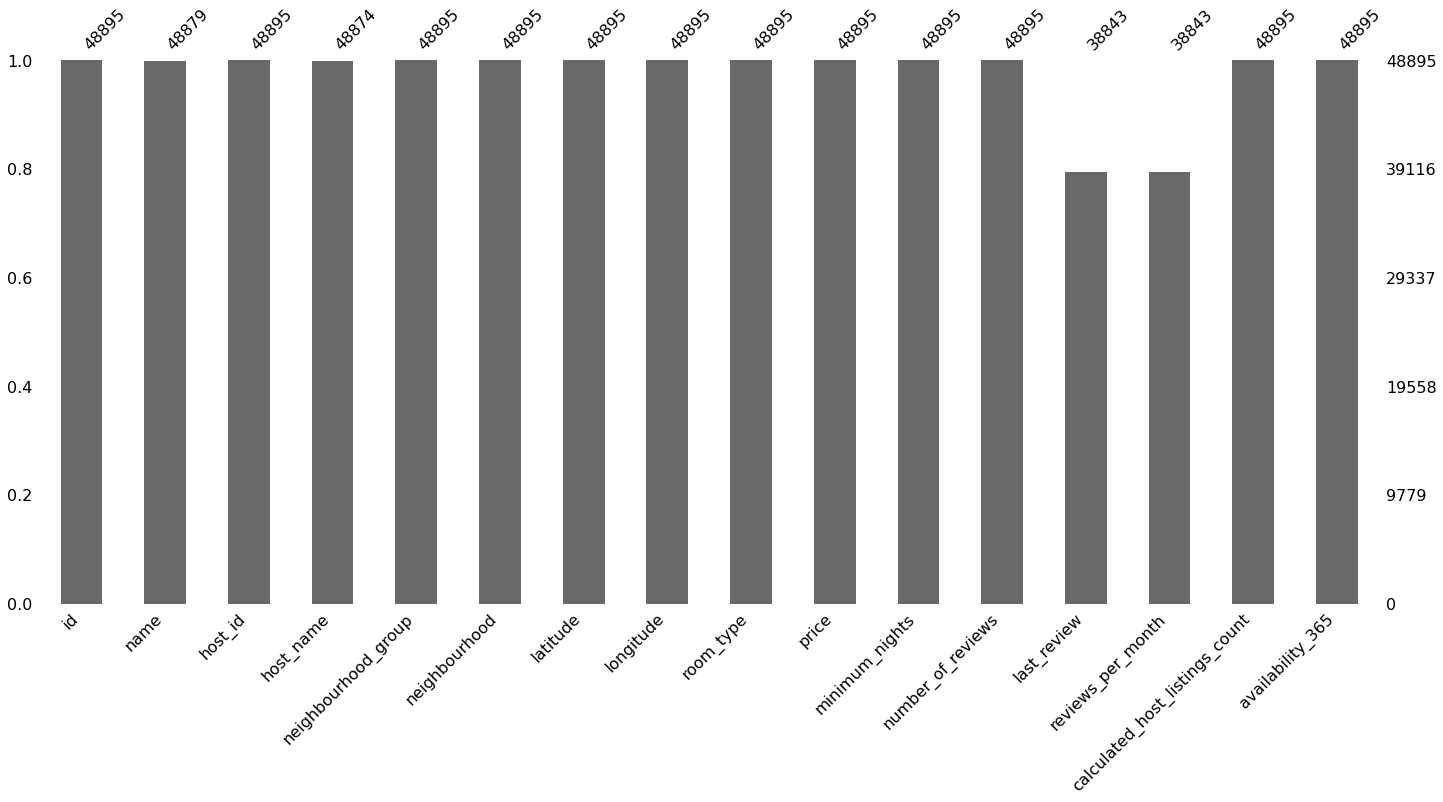

In [7]:
# using missingno library for quick visualizations.

msno.bar(air_bnb_data)

In [8]:
air_bnb_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
# Checking for any duplicatd values.
air_bnb_data.duplicated().sum()

0

<font color = 'dark pink'>
    
- Observation: 
    
columns "name" and "host_name" are irrelevant and insignificant to our data analysis,
columns "last_review" and "review_per_month" have around '10052'NaN values
As the column "last_review" is date; if there were no reviews for the listing - date simply will not exist.
In our case, this column is irrelevant and insignificant therefore appending those values is not needed. 
For "review_per_month" column we can simply append it with 0.0 for missing values; we can see that in "number_of_review" that column will have a 0, as it is not reviewed.
Therefore, let's proceed with removing columns that are not important and handling of missing data.

In [10]:
# Dropping the columns that are insignificant
air_bnb_data.drop(['id','host_name','last_review'], axis=1, inplace=True)
air_bnb_data.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [11]:
#Imputing all 'NaN' values in 'reviews_per_month' with 0
air_bnb_data.fillna({'reviews_per_month':0}, inplace=True)
air_bnb_data.reviews_per_month.isnull().sum()

0

<AxesSubplot:>

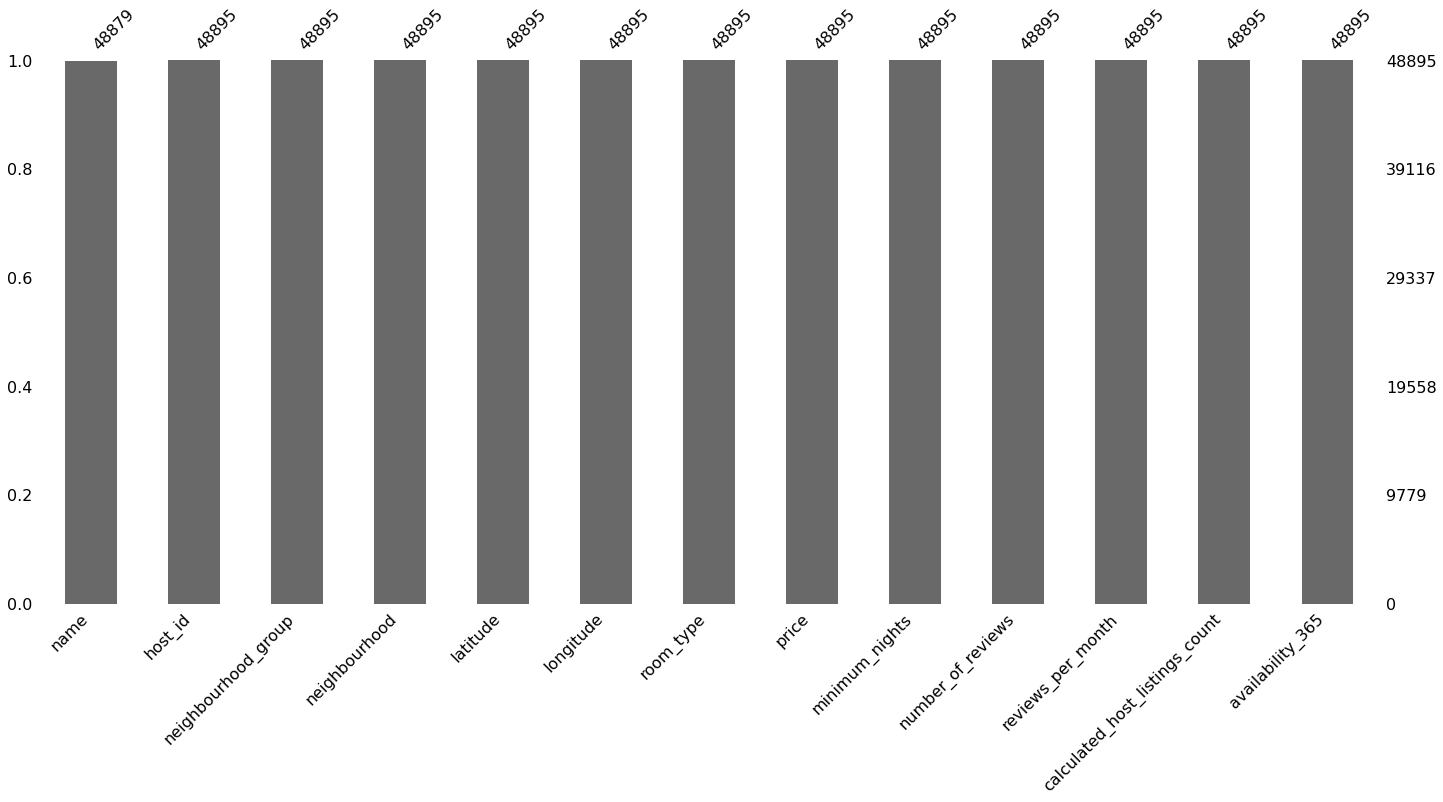

In [12]:
# using missingno library for quick visualizations.

msno.bar(air_bnb_data)

<font color = 'dark pink'>
    
- Observation: 
    
    All missing values are filled now, and we can proceed with further analysis.

In [13]:
# Lets look for unique values in 'neighbourhood_group'
air_bnb_data.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

<AxesSubplot:ylabel='neighbourhood_group'>

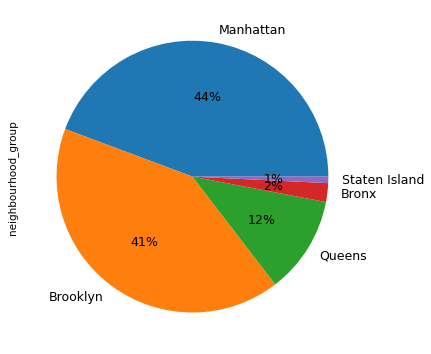

In [14]:
# Checking for share for 'neighbourhood_group'
fig = plt.figure(figsize=(6,6), dpi=75)
air_bnb_data['neighbourhood_group'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=12)

<font color = 'dark pink'>
    
- Observation: 
    'Brooklyn': 41%
    
    'Manhattan': 44%
    
    'Queens': 12%
    
    'Staten Island':1%
    
    'Bronx':2%

In [15]:
# Lets look for unique values in 'room_type'
air_bnb_data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

<AxesSubplot:ylabel='room_type'>

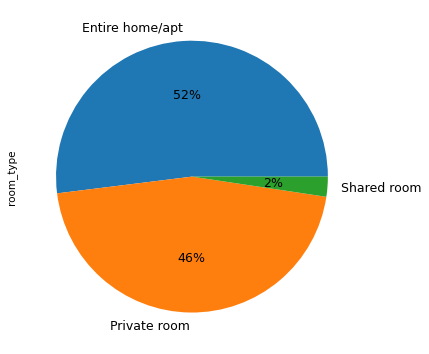

In [16]:
fig = plt.figure(figsize=(6,6), dpi=75)
air_bnb_data['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=12)

In [17]:
# Lets look for unique values in 'neighbourhood'
air_bnb_data.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

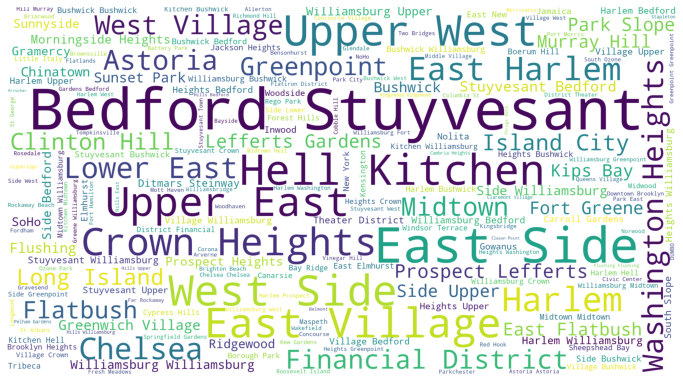

In [18]:
# Checking for most popular 'neighbourhood'
plt.subplots(figsize=(12,12))
wordcloud = WordCloud(background_color='white', width=2000,height=1100).generate(" ".join(air_bnb_data.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<AxesSubplot:ylabel='neighbourhood'>

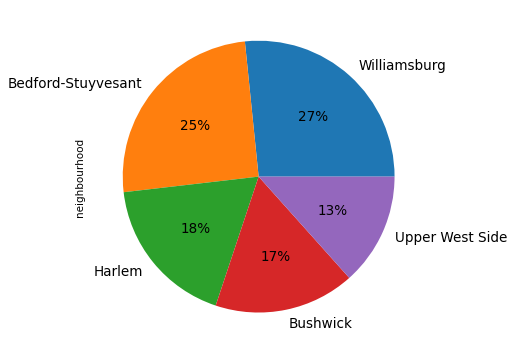

In [19]:
fig = plt.figure(figsize=(6,6), dpi=75)
air_bnb_data['neighbourhood'].value_counts().iloc[:5].plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

<font color='dark pink'>
    
## 4. Exploratory Data Analysis & Preprocessing

<AxesSubplot:>

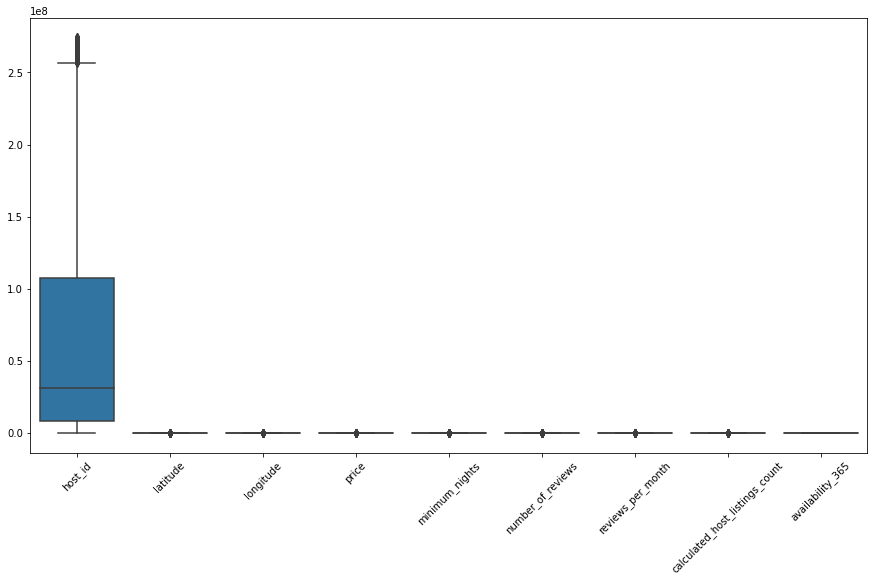

In [20]:
# Using boxplot to look for any outlier
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = air_bnb_data)

<AxesSubplot:xlabel='price'>

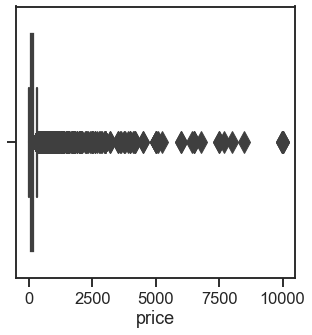

In [21]:
# Box plot to visualise outliers

plt.figure(figsize=(5,5))
plt.tight_layout()
sns.set_style('ticks')
sns.set_context('talk')
sns.boxplot(x=air_bnb_data['price'],data=air_bnb_data,fliersize=15)

In [22]:
air_bnb_data[air_bnb_data['price'] == 10000.0]

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
9151,Furnished room in Astoria apartment,20582832,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0
17692,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0
29238,1-BR Lincoln Center,72390391,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0.00,1,83


<font color = 'dark pink'>
    
- Observation: 
    
    We have 3 airbnbs with 10000 per night luxury stay, one private room and 2 home stay.

In [23]:
air_bnb_data['minimum_nights'].value_counts()

1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
85         1
182        1
39         1
87         1
36         1
Name: minimum_nights, Length: 109, dtype: int64

<AxesSubplot:>

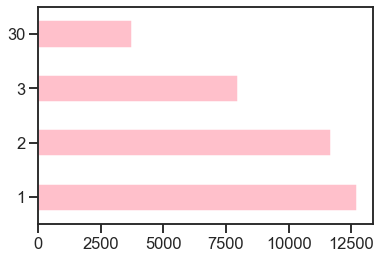

In [24]:
air_bnb_data['minimum_nights'].value_counts().iloc[:4].plot(kind = 'barh', color='pink')

<font color = 'dark pink'>
    
- Observation: 
    
    Almost 3.7k stayed upto a month.


In [25]:
air_bnb_data['number_of_reviews'].value_counts()

0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
326        1
439        1
594        1
335        1
607        1
Name: number_of_reviews, Length: 394, dtype: int64

<font color = 'dark pink'>
    
- Observation: 
    
    5.2k has around 1 review and the maximum number of reviews is 607 which only 1 airbnb has.

In [26]:
air_bnb_data[air_bnb_data['number_of_reviews'] == 607]

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293


<font color = 'dark pink'>
    
- Observation: 
    
    Great Bedroom in Manhattan gets the highest reviews and it costs around 69 dollars.

In [27]:
air_bnb_data['availability_365'].value_counts()

0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
196       24
183       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64

In [28]:
air_bnb_data[air_bnb_data['availability_365'] == 365].describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.295000e+03,1295.000000,1295.000000,1295.000000,1295.00000,1295.000000,1295.000000,1295.000000,1295.0
mean,8.554698e+07,40.729014,-73.943275,250.769884,19.60000,10.220849,0.540672,13.158301,365.0
std,8.786960e+07,0.057781,0.059799,550.497373,65.05093,22.095983,0.980481,36.224171,0.0
min,2.787000e+03,40.507080,-74.242850,20.000000,1.00000,0.000000,0.000000,1.000000,365.0
25%,8.931349e+06,40.687990,-73.983210,72.000000,1.00000,0.000000,0.000000,1.000000,365.0
50%,4.634351e+07,40.730990,-73.954270,125.000000,3.00000,2.000000,0.120000,2.000000,365.0
75%,1.565055e+08,40.762095,-73.921715,225.000000,30.00000,10.000000,0.630000,7.000000,365.0
max,2.733930e+08,40.893740,-73.721730,9999.000000,1250.00000,183.000000,8.940000,327.000000,365.0


<font color = 'dark pink'>
    
- Observation:
    
    For a year of availablity airbnb  costs around 10k dollars with average of 250 dollars.

### Calculate host listing

In [29]:
air_bnb_data.calculated_host_listings_count.value_counts().iloc[:5]

1    32303
2     6658
3     2853
4     1440
5      845
Name: calculated_host_listings_count, dtype: int64

<AxesSubplot:>

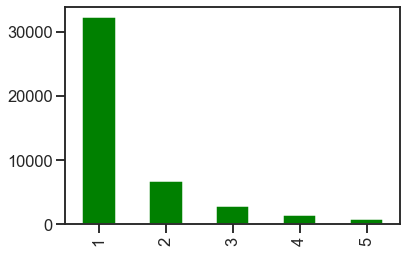

In [30]:
air_bnb_data.calculated_host_listings_count.value_counts().iloc[:5].plot(kind = 'bar', color = 'green')

<font color = 'dark pink'>
    
- Observation:
    
    listing was used mostly once 32.3k times.

### Analysing Reviews per month

In [31]:
air_bnb_data[air_bnb_data['reviews_per_month'] > 1].reviews_per_month.value_counts().sum()                 

15908

In [32]:
air_bnb_data['reviews_per_month'].max()

58.5

In [33]:
air_bnb_data[air_bnb_data['reviews_per_month'] == 58.5]

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
42075,Enjoy great views of the City in our Deluxe Room!,244361589,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,58.5,9,299


<font color = 'dark pink'>
    
- Observation:
   
    406 airbnbs have 2 reviews per month.
    
    Enjoy great views in Manhattan has the highest reviews per month. 
    
    They offer Private room and is worth 100 dollars a night.



### Carrying out Bivariate Analysis

<AxesSubplot:>

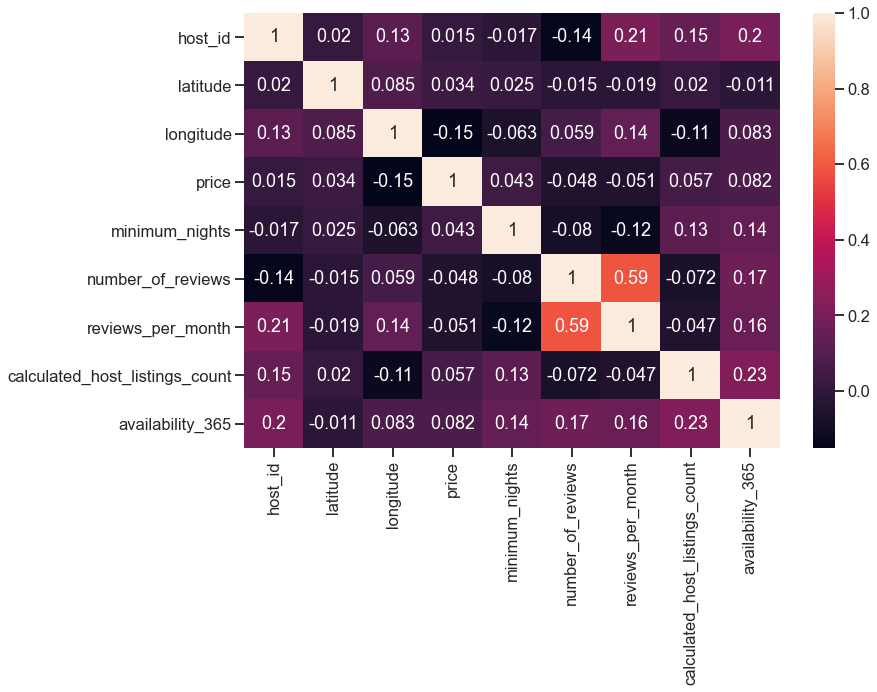

In [34]:
corr = air_bnb_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

<font color = 'dark pink'>
    
- Observation:
    
    1) 'price' and 'longitude' are -vely correlated to each other.
    
    2) 'number_of_reviews' and 'host_id' are also -vely correlated to each other.
    
    3) 'number_of_reviews' and 'number_of_reviews' are positively related to each other.

### Carrying Maps - Scatterplots visualisation

#### Plotting 'neighbourhood_group' on longitude vs latitude

In [35]:
air_bnb_data['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

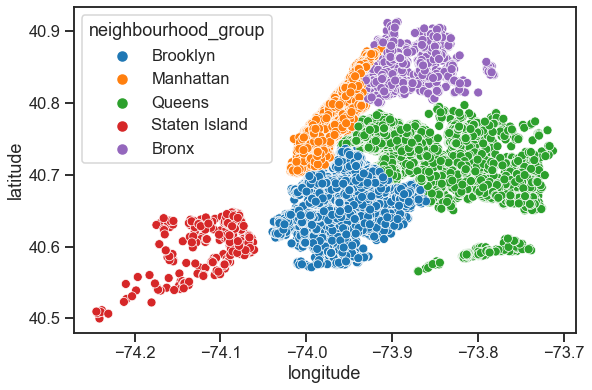

In [36]:
plt.figure(figsize=(9,6))
sns.scatterplot(air_bnb_data.longitude,air_bnb_data.latitude,hue=air_bnb_data.neighbourhood_group)

#### Plotting room 'availablity_365' days on Longitude vs Latitude

In [37]:
air_bnb_data['availability_365'].value_counts()

0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
196       24
183       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

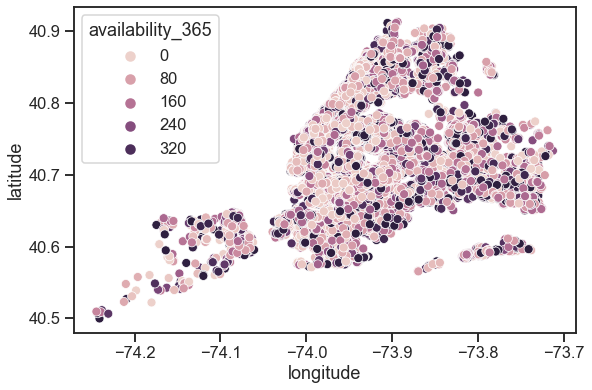

In [38]:
plt.figure(figsize=(9,6))
sns.scatterplot(air_bnb_data.longitude,air_bnb_data.latitude,hue=air_bnb_data.availability_365)

#### Plotting 'room_type' on Longitude vs Latitude

In [39]:
air_bnb_data['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

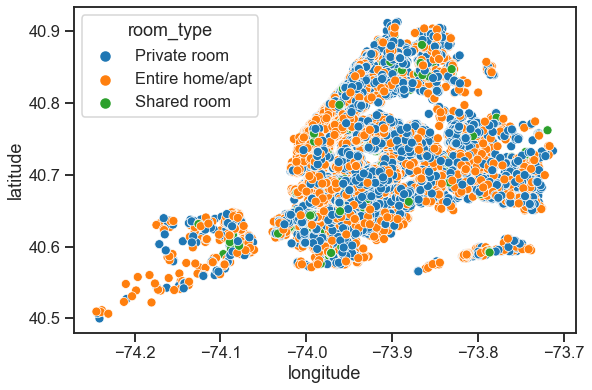

In [40]:
plt.figure(figsize=(9,6))
sns.scatterplot(air_bnb_data.longitude,air_bnb_data.latitude,hue=air_bnb_data.room_type)

#### Plotting 'room_type'and 'neighbourhood_group'

<AxesSubplot:xlabel='room_type', ylabel='count'>

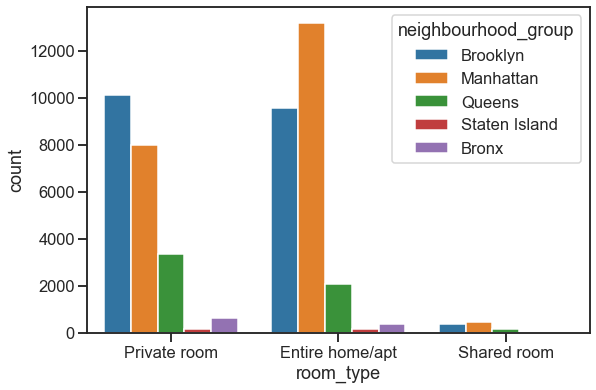

In [41]:
plt.figure(figsize=(9,6))
sns.countplot(data = air_bnb_data, x = 'room_type', hue = 'neighbourhood_group')

Home service seems to be most used by people and the highest in Manhattan. This is also the highest service used across New York City.

In Brooklyn, Private rooms were more used.

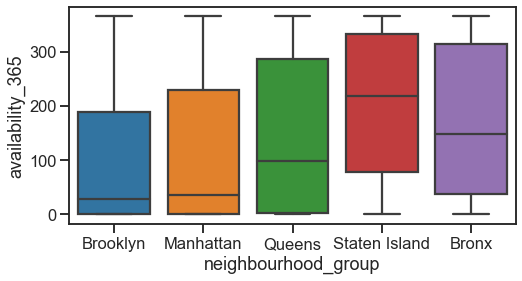

In [42]:
plt.figure(figsize=(8,4))
ax = sns.boxplot(data=air_bnb_data, x='neighbourhood_group',y='availability_365')

Staten Island has th highest average airbnb availablity.


<AxesSubplot:>

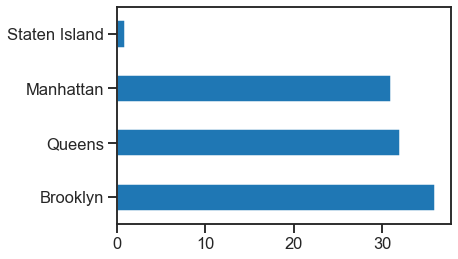

In [43]:
# Rooms with top 100 reviews by neighbourhood
neigh_reviews=air_bnb_data.sort_values(by=['number_of_reviews'],ascending=False).head(100)
neigh_reviews['neighbourhood_group'].value_counts().plot(kind = 'barh')

If we look at the top 100 airbnb's with number of reviews, Brooklyn has highest reviews followed by Queens and then Manhattan.

<AxesSubplot:>

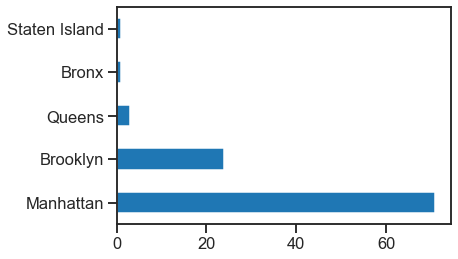

In [44]:
# Rooms with top 100 expensive by neighbourhood
neigh_price=air_bnb_data.sort_values(by=['price'],ascending=False).head(100)
neigh_price['neighbourhood_group'].value_counts().plot(kind = 'barh')

If we take the top 100 airbnbs then almost 70+ comes in Manhattan, followed by 25 in Brooklyn.


<AxesSubplot:>

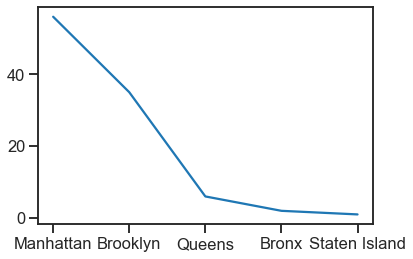

In [45]:
# Rooms with top 100 minimum_nights  by neighbourhood
neigh_min_nights=air_bnb_data.sort_values(by=['minimum_nights'],ascending=False).head(100)
neigh_min_nights['neighbourhood_group'].value_counts().plot()

Manhattan has highest airbnbs with highest minimum nights.

Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

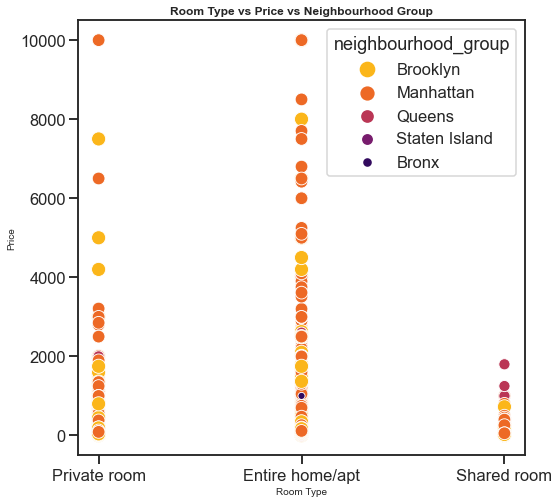

In [46]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group", size="neighbourhood_group",
            sizes=(50, 200), palette="inferno_r", data=air_bnb_data)

plt.xlabel("Room Type", size=10)
plt.ylabel("Price", size=10)
plt.title("Room Type vs Price vs Neighbourhood Group",size=12, weight='bold')

In [47]:
#let's grab 10 most reviewed listings in NYC
top_reviewed_listings=air_bnb_data.nlargest(10,'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


### Conclusion

This Airbnb ('AB_NYC_2019') dataset for the 2019 year appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration on each significant column presented.
First, we have found hosts that take good advantage of the Airbnb platform and provide the most listings; we found that our top host has 327 listings. 
After that, we proceeded with analyzing boroughs and neighborhood listing densities and what areas were more popular than others. 
Next, we put good use of our latitude and longitude columns and used them to create a geographical heatmap color-coded by the price of listings. 
Further, we came back to the first column with name strings and had to do a bit more coding to parse each title and analyze existing trends on how listings are named as well as what was the count for the most used words by hosts.
Lastly, we found the most reviewed listings and analyzed some additional attributes. For our data exploration purposes, it also would be nice to have a couple of additional features, 
such as positive and negative numeric (0-5 stars) reviews or 0-5 star average reviews for each listing; the addition of these features would help to determine the best-reviewed hosts for NYC along with 'number_of_review' column that is provided.
Overall, we discovered a very good number of interesting relationships between features and explained each step of the process. This data analytics is very much mimicked on a higher level on the Airbnb Data/Machine Learning team for better business decisions, 
control over the platform, marketing initiatives, implementation of new features, and much more.